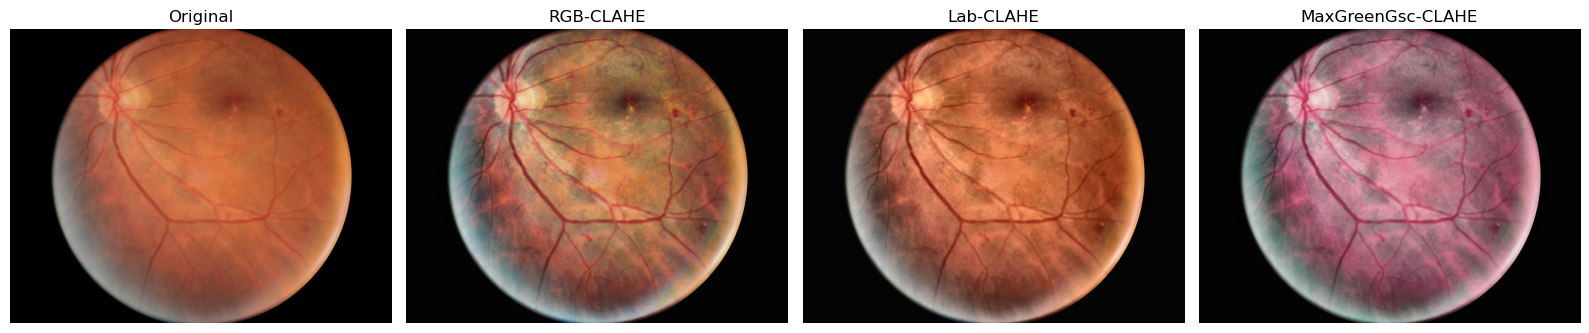

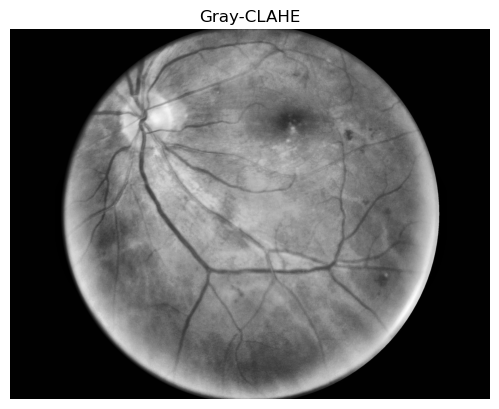

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def rgb_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    channels = cv2.split(image)
    cl_channels = [clahe.apply(channel) for channel in channels]
    cl_image = cv2.merge(cl_channels)
    return cl_image

def lab_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l_channel)
    merged = cv2.merge((cl, a_channel, b_channel))
    rgb_image = cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)
    return rgb_image

def max_green_gsc_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    green_channel = image[:, :, 1]
    max_pixel_image = np.maximum.reduce([image[:, :, 0], image[:, :, 1], image[:, :, 2]])
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    gray_clahe = clahe.apply(gray_image)
    green_clahe = clahe.apply(green_channel)
    max_pixel_clahe = clahe.apply(max_pixel_image)
    max_green_gsc_clahe_image = cv2.merge([gray_clahe, green_clahe, max_pixel_clahe])
    return max_green_gsc_clahe_image

def gray_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    gray_clahe_image = clahe.apply(gray_image)
    return gray_clahe_image


# Example usage with matplotlib
input_image = cv2.imread('../data/image_4.jpg')

# RGB-CLAHE
rgb_clahe_image = rgb_clahe(input_image)

# Lab-CLAHE
lab_clahe_image = lab_clahe(input_image)

# MaxGreenGsc-CLAHE
max_green_gsc_clahe_image = max_green_gsc_clahe(input_image)

# Gray-CLAHE
gray_clahe_image = gray_clahe(input_image)

# Plotting all images side by side
plt.figure(figsize=(16, 6))

# Original image
plt.subplot(141)
plt.title('Original')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# RGB-CLAHE
plt.subplot(142)
plt.title('RGB-CLAHE')
plt.imshow(cv2.cvtColor(rgb_clahe_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Lab-CLAHE
plt.subplot(143)
plt.title('Lab-CLAHE')
plt.imshow(cv2.cvtColor(lab_clahe_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# MaxGreenGsc-CLAHE
plt.subplot(144)
plt.title('MaxGreenGsc-CLAHE')
plt.imshow(cv2.cvtColor(max_green_gsc_clahe_image, cv2.COLOR_BGR2RGB))
plt.axis('off')



plt.tight_layout()
plt.show()

plt.title('Gray-CLAHE')
plt.imshow(gray_clahe_image, cmap='gray')
plt.axis('off')
plt.show()
